In [71]:
from Training import DataCreateUpdated as dc
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random

# rec_paths = ["OpenBCI-RAW-2021-12-02_19-19-53.txt", 
#                 "OpenBCI-RAW-2021-12-02_19-31-12.txt", 
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_JawClench_2\OpenBCI-RAW-2022-02-16_19-30-28.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_1\OpenBCI-RAW-2022-02-16_19-33-20.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_2\OpenBCI-RAW-2022-02-16_19-39-23.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_RightBlink_1\OpenBCI-RAW-2022-02-16_19-42-03.txt"]
# label_paths = ["JawClench_labels_Ansh_12-02-21-1918.txt", 
#                 "JawClench_labels_Ansh_12-02-21-1930.txt", 
#                 "Recordings\Spring_2022\Evan_JawClench_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_2.txt",
#                 "Recordings\Spring_2022\Evan_RightBlink_1.txt"]
# label_types = ["JAW_CLENCH", 
#                 "JAW_CLENCH", 
#                 "JAW_CLENCH",
#                 "L_EYE",
#                 "L_EYE",
#                 "R_EYE"]


rec_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\OpenBCI-RAW-2022-03-23_20-43-17.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\OpenBCI-RAW-2022-03-23_20-41-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\OpenBCI-RAW-2022-03-23_20-37-06.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\OpenBCI-RAW-2022-03-23_20-39-04.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\OpenBCI-RAW-2022-03-23_20-33-09.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\OpenBCI-RAW-2022-03-23_20-34-58.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\OpenBCI-RAW-2022-03-23_20-21-37.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\OpenBCI-RAW-2022-03-23_20-25-30.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\OpenBCI-RAW-2022-03-23_20-27-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\OpenBCI-RAW-2022-03-23_20-29-16.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowLower_1\OpenBCI-RAW-2022-03-26_18-33-15.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-04-22_Live_BrowRaise_1\OpenBCI-RAW-2022-04-22_18-03-15.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_JawClench_1\OpenBCI-RAW-2022-03-26_18-21-33.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_LeftBlink_1\OpenBCI-RAW-2022-03-26_18-25-33.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_RightBlink_1\OpenBCI-RAW-2022-03-26_18-04-32.txt"]

validation_rec_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowLower_2\OpenBCI-RAW-2022-03-26_18-35-00.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowRaise_2\OpenBCI-RAW-2022-03-26_18-39-58.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_JawClench_2\OpenBCI-RAW-2022-03-26_18-23-24.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_LeftBlink_2\OpenBCI-RAW-2022-03-26_18-30-33.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_RightBlink_2\OpenBCI-RAW-2022-03-26_18-07-12.txt"]
            

label_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowLower_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-04-22_Live_BrowRaise_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_JawClench_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_LeftBlink_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_RightBlink_1\labels.txt"]

validation_label_paths = [
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowLower_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_BrowRaise_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_JawClench_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_LeftBlink_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-26_Sam_RightBlink_2\labels.txt"]
            
label_types = ["BROW_DOWN", "BROW_DOWN", "BROW_UP", "BROW_UP", "JAW_CLENCH", "JAW_CLENCH", "L_EYE", "L_EYE", "R_EYE", "R_EYE", "BROW_DOWN", "BROW_UP", "JAW_CLENCH", "L_EYE", "R_EYE"]
validation_label_types = ["BROW_DOWN", "BROW_UP", "JAW_CLENCH", "L_EYE", "R_EYE"]
#Chooses which input data to use
inputsToUse = np.arange(len(rec_paths))

In [18]:
# Data visualization for the sample data at index sdi
# Go to next block for actual code
def visualize_data(sdi):
    sample_obs = dc.getObservations(rec_paths[sdi], label_paths[sdi], 1000, [0,1,2,3], label_types[sdi])

    sample_y_channels_groups, sample_ind_groups, sample_t_groups, sample_l_groups = sample_obs
    
    na_ind = 0 #non-action
    a_ind = 0 #action

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.xlabel('mean_abs_dev')
    plt.ylabel('channel')

    colorgood = 'blue'
    colorbad = 'red'
    pos = -1
    for channel_groups in sample_y_channels_groups:
        pos = (pos+1)%4
        for i in range(channel_groups.shape[0]):
            if(sample_l_groups[i][0] == 1):
                color = colorbad
                if(random.randint(0, 2*na_ind) < 1):
                    na_ind = i
            else:
                color = colorgood
                if(random.randint(0, 2*a_ind) < 1):
                    a_ind = i
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), pos, 'x', color = color)
    
    plt.subplot(1,3,2)
    plt.xlabel('index - Action: ' + str(a_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[a_ind], channel_groups[a_ind])


    plt.subplot(1,3,3)
    plt.xlabel('index - No Action: ' + str(na_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[na_ind], channel_groups[na_ind])

In [3]:
# for input in inputsToUse:
#     visualize_data(input)

In [19]:
def getMeanAbsDeviation(dchannel):
    return np.transpose(np.mean(np.abs(dchannel - np.mean(dchannel, axis=2, keepdims=True)), axis=2))

def getMeanSquaredDeviation(dchannel):
    return np.transpose(np.mean(np.square(dchannel - np.mean(dchannel, axis=2, keepdims=True)), axis=2))

def getMean(dchannel):
    return np.transpose(np.mean(dchannel, axis=2))

def getPercentile(dchannel, percent):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile10(dchannel, percent=10):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile90(dchannel, percent=90):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile15(dchannel, percent=15):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile85(dchannel, percent=85):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile5(dchannel, percent=5):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile95(dchannel, percent=95):
    return np.transpose(np.percentile(dchannel, percent, axis=2))


def getSpread(dchannel):
    return np.transpose(np.max(dchannel, axis=2) - np.min(dchannel, axis=2))

def getSpreadPercentile(dchannel, low=5, high=95):
    return getPercentile(dchannel, high) - getPercentile(dchannel, low)

def getPeakCount(dchannel, w=3):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

def getPeakCount5(dchannel, w=5):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

def getPeakCount1(dchannel, w=1):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

In [88]:
# Loads in X and Y
functsList = [getMean, getMeanSquaredDeviation, getMeanAbsDeviation, getSpreadPercentile, getPeakCount, getPercentile10, getPercentile90]
meanScale = []
stdevScale = []
functsDict = {}
valfunctsDict = {}
for featureFunc in functsList:
    y = None
    fX = None
    valFx = None
    for i in inputsToUse:
        obs = dc.getObservations(rec_paths[i], label_paths[i], 1000, [0,1,2,3], label_types[i])
        y_channels_groups, ind_groups, t_groups, l_groups = obs
        # y_channels_groups = y_channels_groups[:, 5:-5, :]
        # l_groups = l_groups[5:-5, :]
        zero_channel_groups = np.array([y_channels_groups[:, i, :] for i in range(y_channels_groups.shape[1]) if l_groups[i][0] == 1])
        zero_channel_groups = np.swapaxes(zero_channel_groups, 0, 1)
        nextF = featureFunc(y_channels_groups)
        nextF_callibrate = featureFunc(zero_channel_groups)
        nextF = (nextF - np.mean(nextF_callibrate, axis=0))/np.std(nextF_callibrate, axis=0)
        if fX is not None:
            fX = np.concatenate((fX, nextF))
            y = np.concatenate((y, l_groups))
        else:
            fX = nextF
            y = l_groups

    functsDict[featureFunc] = fX

    valy = None
    for i in range(len(validation_rec_paths)):
        obs = dc.getObservations(validation_rec_paths[i], validation_label_paths[i], 1000, [0,1,2,3], validation_label_types[i])
        y_channels_groups, ind_groups, t_groups, l_groups = obs
        # y_channels_groups = y_channels_groups[:, 5:-5, :]
        # l_groups = l_groups[5:-5, :]
        zero_channel_groups = np.array([y_channels_groups[:, i, :] for i in range(y_channels_groups.shape[1]) if l_groups[i][0] == 1])
        zero_channel_groups = np.swapaxes(zero_channel_groups, 0, 1)
        nextF = featureFunc(y_channels_groups)
        nextF_callibrate = featureFunc(zero_channel_groups)
        nextF = (nextF - np.mean(nextF_callibrate, axis=0))/np.std(nextF_callibrate, axis=0)
        if valFx is not None:
            valFx = np.concatenate((valFx, nextF))
            valy = np.concatenate((valy, l_groups))
        else:
            valFx = nextF
            valy = l_groups

    valfunctsDict[featureFunc] = valFx


In [76]:
def createX(fDict, count, fIndices = None):
    X = None
    # featureList = [functsDict[getMean], functsDict[getMeanAbsDeviation]]
    ftotal = []
    fnames = []
    for f in fDict.values():
        ftotal.append(f)
    for f in fDict.keys():
        fnames.append(f)
    if fIndices is None:
        fIndices = random.sample(range(len(ftotal)), count)
    featureList = [ftotal[i] for i in fIndices]
    fnames = [fnames[i] for i in fIndices]
    for feature in featureList:
        if(X is None):
            X = feature
        else:
            X = np.concatenate((X, feature), axis=1)
    return X, fnames

In [77]:
#test-train split

X, find = createX(functsDict, 3)
valX, valFind = createX(valfunctsDict, 3)

# X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)    

In [78]:
from imblearn.over_sampling import SMOTE

def oversample(X, y):
    X_combined = np.concatenate((X, y), axis=1)
    over_sampler = SMOTE(random_state=4)
    X_combined, _ = over_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
    X_res = X_combined[:, 0:X.shape[1]]
    y_res = X_combined[:, X.shape[1]:X_combined.shape[1]]
    return X_res, y_res



# Under Sampling
from imblearn.under_sampling import RandomUnderSampler
def undersample(X, y):
    X_combined = np.concatenate((X, y), axis=1)
    under_sampler = RandomUnderSampler(sampling_strategy = 'majority', random_state=42)
    # print(X.shape, y.shape)
    X_res, y_res = under_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
    # print(X_res.shape, y_res.shape)
    X = X_res[:, 0:X.shape[1]]
    y = X_res[:, X.shape[1]:X_res.shape[1]]
    return X, y


In [112]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


def getMetrics(X, y, valX, valy, verbose=True, scale = 2, overOrUnder = None, max_depth=6, n_estimators=100, learning_rate=0.1):
    # X_res, X_eval, y_res, y_eval = train_test_split(X, y, test_size=0.4, random_state = 4)
    X_res, X_eval, y_res, y_eval = X, valX, y, valy
    
    # action_classifier = KNeighborsClassifier((int)(scale*K) + 1)
    # knn_classifier = KNeighborsClassifier(K)
    # action_classifier = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
    knn_classifier = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
    # action_classifier = svm.SVC()
    # knn_classifier = svm.SVC()
    action_classifier = None
    # action_classifier.fit(X_res, y_res[:, 0])
    X_res, y_res = undersample(X_res, y_res)
    # action_present = action_classifier.predict(X_res)
    # X_res = np.concatenate((X_res, np.expand_dims(action_present, 1)), axis=1)

    # eval_action_present = action_classifier.predict(X_eval)
    # X_eval = np.concatenate((X_eval, np.expand_dims(eval_action_present, 1)), axis=1)

    if overOrUnder is not None:
        if not overOrUnder:
            X_eval, y_eval = undersample(X_eval, y_eval)
        else:
            X_eval, y_eval = oversample(X_eval, y_eval)
    knn_classifier.fit(X_res, np.argmax(y_res, axis=1))

    # relevant_action_present = action_classifier.predict(X_eval)
    original_pred = knn_classifier.predict(X_eval)
    # predictions = np.multiply((1-relevant_action_present), original_pred)
    predictions = original_pred
    
    # print(original_pred[0:10], action_present[0:10], predictions[0: 10])
    recall = sklearn.metrics.recall_score(np.argmax(y_eval, axis=1), predictions, average=None)
    precision = sklearn.metrics.precision_score(np.argmax(y_eval, axis=1), predictions, average=None, zero_division=0)
    accuracy = sklearn.metrics.accuracy_score(np.argmax(y_eval, axis=1), predictions)
    if(verbose):
        print("Results (KNN): ")
        print("Recall: \t", recall)
        print("Precision: \t", precision)
        print((np.sum(precision[1:]) + recall[0])/6)
        print("Accuracy:\t", accuracy)
        sklearn.metrics.ConfusionMatrixDisplay.from_predictions(np.argmax(y_eval, axis=1), predictions)
    else:
        return recall, precision, accuracy, knn_classifier, action_classifier

[0 0 0 ... 0 0 0]
(1080, 24) (359, 24) (1080, 6) (359, 6)
Results (KNN): 
Recall: 	 [0.34134615 0.         0.44711538 0.67307692 0.         0.47115385]
Precision: 	 [0.32126697 0.         0.53142857 0.237691   0.         0.56321839]
0.2789473529628526
Accuracy:	 0.32211538461538464


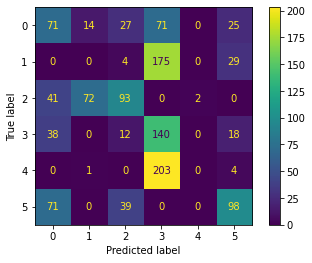

In [117]:
ftu = [0, 1, 2, 3, 5, 6]
# ftu = [0, 1, 3, 4]
X, find = createX(functsDict, 0, ftu)
valX, valFind = createX(valfunctsDict, 0, ftu)
print(np.argmax(y, axis=1))
print(X.shape, valX.shape, y.shape, valy.shape)

scale = 1
i = 4
j = 100
k = 0.01
getMetrics(X, y, valX, valy, verbose=True, scale=scale, overOrUnder = True, n_estimators = j, max_depth = i, learning_rate = k)
_, _, _, kc, ac = getMetrics(X, y, valX, valy, verbose=False, scale=scale, overOrUnder = True, n_estimators = j, max_depth = i, learning_rate = k)




In [85]:
from joblib import dump, load
dump(kc, 'prod_action_XGB_presence.joblib') 
dump(ac, 'prod_non_selector_XGB_type.joblib') 

['prod_non_selector_XGB_NAFeature.joblib']

In [120]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01]
}
ftu = [0, 1, 2, 3, 4, 5, 6]
X, find = createX(functsDict, 0, ftu)
valX, valFind = createX(valfunctsDict, 0, ftu)
best_acc = 0
it = 0
maxit = len(parameters['max_depth']) * len(parameters['n_estimators']) * len(parameters['learning_rate'])
best_model = None
for i in parameters['max_depth']:
    for j in parameters['n_estimators']:
        for k in parameters['learning_rate']:
            it+=1
            if(it%25 == 0):
                print(it/maxit)
            rec, pre, acc, cur, cur_na = getMetrics(X, y, valX, valy, verbose=False, scale=scale, overOrUnder = True, n_estimators = j, max_depth = i, learning_rate = k)
            if(acc + rec[0] + np.sum(pre[1:]) > best_acc):
                print(acc, i, j, k)
                print(rec)
                print(pre)
                print()
                best_acc = acc + rec[0] + np.sum(pre[1:])
                best_model = cur

0.28525641025641024 2 60 0.1
[0.43269231 0.         0.1875     0.75961538 0.         0.33173077]
[0.24390244 0.         0.39       0.25859247 0.         0.552     ]

0.31009615384615385 2 100 0.1
[0.45673077 0.         0.22596154 0.82692308 0.         0.35096154]
[0.24739583 0.         0.46534653 0.28289474 0.         0.5530303 ]

0.32051282051282054 2 140 0.1
[0.46153846 0.         0.3125     0.78846154 0.         0.36057692]
[0.24742268 0.         0.55555556 0.28082192 0.         0.52816901]

0.34775641025641024 2 180 0.1
[0.55288462 0.         0.38461538 0.79807692 0.         0.35096154]
[0.2804878  0.         0.62015504 0.3040293  0.         0.48026316]

0.390625
0.78125


In [106]:
countper = 30
bestloss = 0
for cc in range((int)(len(functsList)*countper/1.2)):
    if(cc%50 == 0):
        print(cc)
    X, find = createX(functsDict, cc//countper + 1)
    valX, valFind = createX(valfunctsDict, cc//countper + 1)
    # X_res, y_res = oversample(X_res, y_res)
    # X_test, y_test = oversample(X_test, y_test)
    accuarr = []
    scales = []
    kvals = []
    prec = []
    rec0 = []
    for kk in range(2):
        for i in range(1, 11, 2):
            scale = 1.25 + np.random.random()
            rec, pre, acc, _, _ = getMetrics(i, X, y, valX, valy, verbose=False, scale=scale, overOrUnder = True)
            accuarr.append(acc)
            scales.append(scale)
            kvals.append(i)
            rec0.append(rec[0])
            prec.append(np.mean(pre[1:]))
    loss_func = np.add(accuarr, rec0)/2
    if(np.max(loss_func) > bestloss):
        bestloss = np.max(loss_func)
        bestacc = accuarr[np.argmax(loss_func)]
        bestX = X
        bestFind = find
        bestScale = scales[np.argmax(loss_func)]
        params = (kvals[np.argmax(loss_func)], bestScale, np.max(loss_func))
        print(params, accuarr[np.argmax(loss_func)])
        # getMetrics(np.argmax(accuarr)+1, X_test, y_test)
        r, p, a, best, best_na = getMetrics(np.argmax(loss_func)+1, X, y, valX, valy, verbose=False, scale=bestScale)

print("Best Accuracy: ", bestacc)
print("Functions: ", bestFind)
print("Hyperparams: ", params)
print("Recall: ", r)
print("Precision: ", p)
getMetrics(params[0], bestX, y, scale=bestScale, overOrUnder = True)


0
(1, 1.4295101837167914, 0.2844551282051282) 0.16987179487179488
(3, 1.259689331989034, 0.3112980769230769) 0.2860576923076923
(1, 1.8294242190794232, 0.3373397435897436) 0.20352564102564102
(9, 2.0552973710712594, 0.4655448717948718) 0.33974358974358976
50
(1, 1.7698029329985339, 0.48036858974358976) 0.23477564102564102
100
150
Best Accuracy:  0.23477564102564102
Functions:  [<function getPeakCount at 0x000002A3082863A0>, <function getMean at 0x000002A307ACCCA0>]
Hyperparams:  (1, 1.7698029329985339, 0.48036858974358976)
Recall:  [0.72596154 0.05882353 0.15625    0.42307692 0.07142857 0.06451613]
Precision:  [0.5719697  0.5        0.33333333 0.26829268 0.1        0.13333333]


TypeError: getMetrics() missing 2 required positional arguments: 'valX' and 'valy'